In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense

from keras.datasets import mnist
from keras.utils import np_utils
nb_classes = 10

In [30]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [34]:
# normalize inputs from 0-255 to 0-1
# Put everything on grayscale
X_train = X_train / 255
X_test = X_test / 255

In [35]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [36]:
X_train[0].shape

(784,)

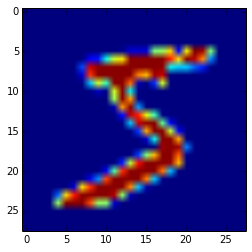

In [37]:
plt.imshow(X_train[0].reshape(28, 28))

In [38]:
print(np.asarray(range(10)))
print(y_train[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 0 0 0 0]


In [39]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [40]:
#Define model architecture
network_history = model.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
 - 8s - loss: 0.2435 - acc: 0.9296
Epoch 2/10
 - 8s - loss: 0.0856 - acc: 0.9738
Epoch 3/10
 - 8s - loss: 0.0539 - acc: 0.9834
Epoch 4/10
 - 8s - loss: 0.0344 - acc: 0.9892
Epoch 5/10
 - 8s - loss: 0.0273 - acc: 0.9915
Epoch 6/10
 - 8s - loss: 0.0197 - acc: 0.9936
Epoch 7/10
 - 8s - loss: 0.0196 - acc: 0.9936
Epoch 8/10
 - 8s - loss: 0.0138 - acc: 0.9956
Epoch 9/10
 - 8s - loss: 0.0113 - acc: 0.9963
Epoch 10/10
 - 8s - loss: 0.0112 - acc: 0.9964


In [41]:
# Evaluate model on test data
scores = model.evaluate(X_test, y_test, verbose=0)
print scores
print("Error: %.2f%%" % (100-scores[1]*100))

[0.077155023639407586, 0.98219999999999996]
Error: 1.78%


In [42]:
y_predict = model.predict(X_train[:2])
y_predict

array([[  4.36687878e-15,   1.46056290e-12,   3.58699290e-13,
          3.16667487e-04,   2.22522672e-21,   9.99683380e-01,
          2.15469684e-16,   1.70327230e-14,   1.30587188e-14,
          4.96482924e-11],
       [  1.00000000e+00,   4.00316162e-16,   6.59997612e-11,
          8.72524167e-14,   2.74855018e-16,   5.80757383e-15,
          2.91486583e-12,   3.09990376e-14,   7.15363624e-15,
          3.08592561e-12]], dtype=float32)

In [43]:
print np.argmax(y_predict[0]), np.argmax(y_train[0])

5 5


(1, 784)


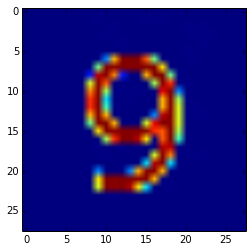

In [47]:
from keras.preprocessing.image import img_to_array, load_img

img = load_img('data/9.jpg', grayscale=True, target_size=(28, 28))
img_arr = img_to_array(img)
img_arr = img_arr.reshape(1, num_pixels).astype('float32') / 255
plt.imshow(img_arr.reshape(28, 28))

print img_arr.shape

In [48]:
y_p = model.predict(img_arr)
y_p

array([[  8.03766920e-09,   5.37531066e-13,   2.32269672e-11,
          9.86715509e-09,   5.20805202e-07,   1.74954486e-08,
          1.04226315e-11,   5.01395458e-09,   1.83225467e-07,
          9.99999166e-01]], dtype=float32)

In [49]:
print np.argmax(y_p[0])

9


In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
